In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd

import ipywidgets as widgets
import folium
from folium import plugins

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/sf_crime.zip')

## San Fransisco Crime Dataset

### San Francisco Map

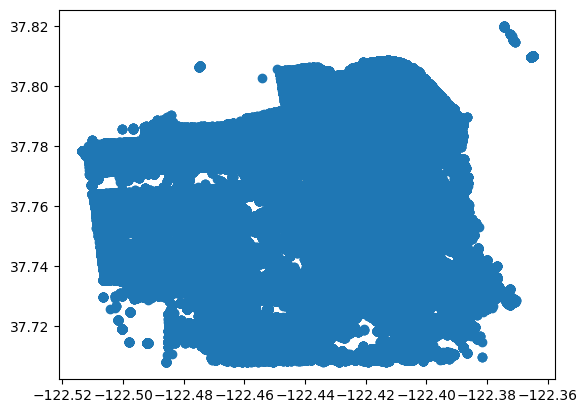

In [3]:
df_removed = df.loc[df['Y'] != df['Y'].max(), :]
df_removed.reset_index(drop=True, inplace=True)
plt.scatter(x=df_removed['X'], y=df_removed['Y']);

### San Francisco Crime Categories

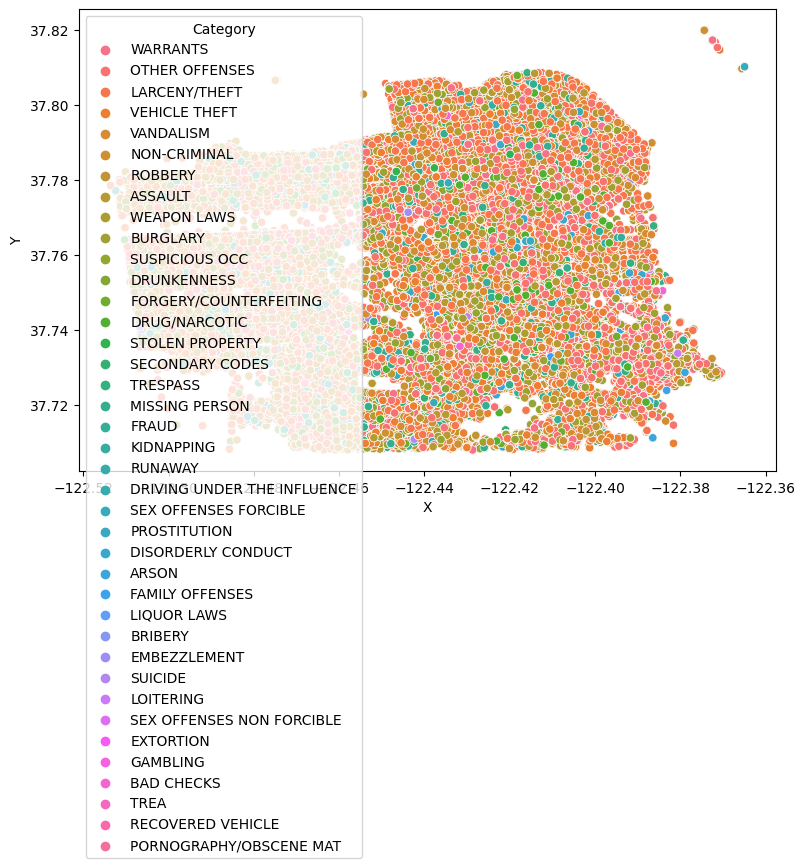

In [4]:
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(data = df_removed, x=df_removed['X'], y=df_removed['Y'], hue = 'Category', 
ax=ax);

### San Francisco Criminal Cases by District

In [5]:
style = {'description_width': 'initial'}
limit_case = widgets.IntSlider(
    value=1000,
    min=100,
    max=5000,
    step=1,
    description='Max N° of Cases:',
    disables=False,
    style=style

)

In [6]:
unique_district= df['PdDistrict'].unique()
unique_categories = df['Category'].unique()

In [7]:
district = widgets.SelectMultiple(
    options = unique_district.tolist(),
    value = ['BAYVIEW', 'NORTHERN'],
    #rows=10,
    description = 'District',
    disables = False,
    layout = widgets.Layout(width='50%', height='80px')
)

category = widgets.SelectMultiple(
    options = unique_categories.tolist(),
    value = ['VANDALISM', 'ASSAULT', 'ROBBERY'],
    #rows=10,
    description = 'Criminal Case',
    disables = False,
    style = style,
    layout = widgets.Layout(width='50%', height='80px')
)

In [11]:
def update_map(district, category, limit):
    
    df = pd.read_csv('data/sf_crime.zip')
    df = df.iloc[0:limit,:]
    
    latitude = 37.77
    longitude = -122.42
    
    df_dist = df.loc[df['PdDistrict'].isin(np.array(district))]
    df_category = df_dist.loc[df_dist['Category'].isin(np.array(category))]
    
    cat_unique = df_category['Category'].value_counts()
    cat_unique = cat_unique.reset_index()
    
    dist_unique = df_category['PdDistrict'].value_counts()
    dist_unique = dist_unique.reset_index()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # create map and dosplay it
    sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)
    
    incidents = folium.plugins.MarkerCluster().add_to(sf_map)
    
    # look through the df and add each data point to the mark cluster
    for lat, lng, label in zip(df_category['Y'], df_category['X'], df_category['Category']):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)
    #show map
    display(sf_map)
    
    ax1.bar(cat_unique['index'], cat_unique['Category'])
    ax1.set_title('Amount of Criminal Case Based on Category')
    ax2.bar(dist_unique['index'], dist_unique['PdDistrict'])
    ax2.set_title('Amount of Criminal Case in Selected District')
    
    plt.show()

In [12]:
widgets.interactive(update_map, district = district, category = category, limit = limit_case)

interactive(children=(SelectMultiple(description='District', index=(3, 0), layout=Layout(height='80px', width=…

In [10]:
# click on Voilà

---